In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from performance_simulation import *

In [14]:
mc = MonteCarloSimulation()
mc.mc_artificial_chart(n=2500, initial_capital=10000, trade_coast=1, spread=0.002)

100%|██████████| 2500/2500 [00:27<00:00, 90.84it/s]


(array([[10000.        ,  9993.52138607,  9987.04696939, ...,
         10942.63918883, 10949.73309817, 10956.83160635],
        [10000.        , 10006.48281389, 10012.96983047, ...,
         10525.30891037, 10532.13227225, 10538.96005759],
        [10000.        , 10006.48281389, 10012.96983047, ...,
         10942.63918883, 10949.73309817, 10956.83160635],
        ...,
        [10000.        ,  9993.52138607,  9987.04696939, ...,
         10322.65081435, 10329.34279676, 10336.03911745],
        [10000.        ,  9993.52138607,  9987.04696939, ...,
         10071.54255075, 10065.01758717, 10058.49685086],
        [10000.        , 10006.48281389, 10012.96983047, ...,
         10322.65081435, 10329.34279676, 10336.03911745]]),
 array([[10000.        , 10000.        , 10000.        , ...,
         10376.28392377, 10376.28392377, 10376.28392377],
        [10000.        , 10000.        , 10000.        , ...,
         10229.40574065, 10229.40574065, 10229.40574065],
        [10000.        , 

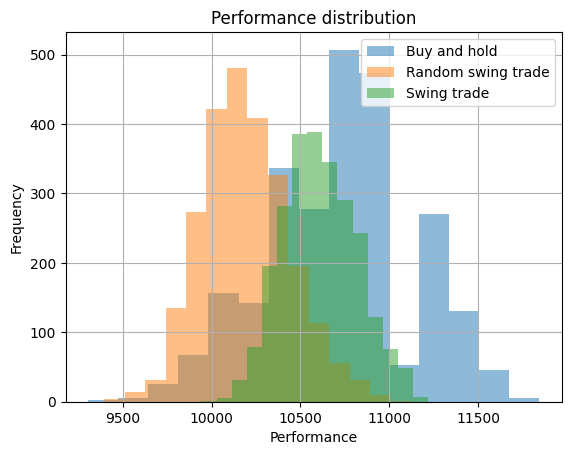

Buy and hold return: 10705.051 +/- 405.482
Random swing trade return: 10192.62 +/- 246.581
Swing trade return: 10607.232 +/- 205.65


In [15]:
mc.hist_performance(bins=15)
mc.print_results(accuracy=3)

In [5]:
mc.chartsim.print_results()

Simulation parameters: 

Yearly return:  1.07
Daily return:  1.000648281389141
Daily loss:  0.9993521386073425
Gain phase:  0.7
Loss phase:  0.3


Buy and hold return:  1.0538960057587694
Random swing trade return analyse:  1.0110706968575849
Swing trade return analyse:  1.0864516618484228
Best return:  1.1171940174072736
